In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/sample_submission.csv')
df.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [ ]:
train = pd.read_csv('/content/train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test = pd.read_csv('/content/test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.shape

(42000, 785)

In [ ]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
train.isna().sum().sum()

0

In [ ]:
test.isna().sum().sum()

0

In [ ]:
train['label'].value_counts().sort_index()

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

Split into image and labels and convert it into numpy arrays

In [ ]:

x = train.iloc[:, 1:].to_numpy()
y = train['label'].to_numpy()

test = test.loc[:, :].to_numpy()

for i in [x, y, test]:
  print(i.shape)


(42000, 784)
(42000,)
(28000, 784)


In [ ]:
#normalize the data

x = x/255.0
test = test/255.0

In [ ]:
for i in [x, test]:       #checking the shape
  print(i.shape)

(42000, 784)
(28000, 784)


In [ ]:
#reshape the dataframe to 3x3 matrix with 1 channel grey scale value

x = x.reshape(-1, 28, 28, 1)
test = test.reshape(-1, 28, 28, 1)

In [ ]:
#checking the shape

for i in [x, test]:
  print(i.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)


In [ ]:
print(y.shape)
print(y[0])

(42000,)
1


In [ ]:
#one hot-encoding

from tensorflow.keras.utils import to_categorical
y_enc = to_categorical(y, num_classes=10)

In [ ]:
print(y.shape)
print(y_enc[0])

(42000,)
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


#Split Train Test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train_enc, y_test_enc = train_test_split(x, y_enc, test_size=0.3)

In [ ]:
for i in [x_train, x_test, y_train_enc, y_test_enc]:
  print(i.shape)


(29400, 28, 28, 1)
(12600, 28, 28, 1)
(29400, 10)
(12600, 10)


#Plot images

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


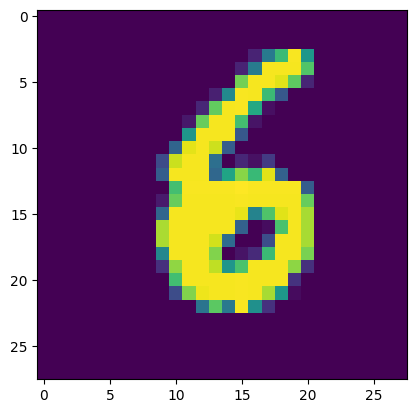

In [ ]:
plt.imshow(x_train[4][:,:,0])
print(y_train_enc[4])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


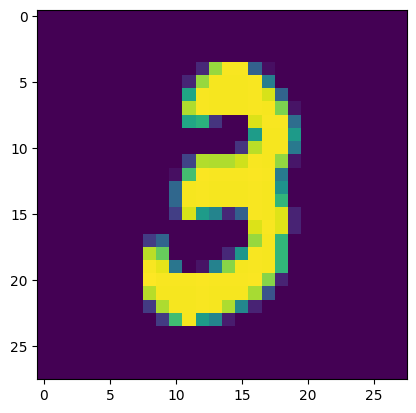

In [ ]:
plt.imshow(x_train[34][:,:,0])
print(y_train_enc[34])

#Model Architecture

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)              

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train_enc,
          epochs=10,
          batch_size=128,
          verbose=2,
          validation_split=0.3)

Epoch 1/10
161/161 - 20s - loss: 0.5833 - accuracy: 0.8162 - val_loss: 0.1399 - val_accuracy: 0.9575 - 20s/epoch - 125ms/step
Epoch 2/10
161/161 - 17s - loss: 0.1493 - accuracy: 0.9567 - val_loss: 0.0928 - val_accuracy: 0.9728 - 17s/epoch - 103ms/step
Epoch 3/10
161/161 - 17s - loss: 0.0977 - accuracy: 0.9711 - val_loss: 0.0656 - val_accuracy: 0.9787 - 17s/epoch - 103ms/step
Epoch 4/10
161/161 - 16s - loss: 0.0777 - accuracy: 0.9770 - val_loss: 0.0587 - val_accuracy: 0.9838 - 16s/epoch - 96ms/step
Epoch 5/10
161/161 - 16s - loss: 0.0605 - accuracy: 0.9815 - val_loss: 0.0560 - val_accuracy: 0.9827 - 16s/epoch - 102ms/step
Epoch 6/10
161/161 - 16s - loss: 0.0508 - accuracy: 0.9848 - val_loss: 0.0419 - val_accuracy: 0.9874 - 16s/epoch - 101ms/step
Epoch 7/10
161/161 - 17s - loss: 0.0460 - accuracy: 0.9860 - val_loss: 0.0439 - val_accuracy: 0.9882 - 17s/epoch - 103ms/step
Epoch 8/10
161/161 - 16s - loss: 0.0342 - accuracy: 0.9902 - val_loss: 0.0563 - val_accuracy: 0.9844 - 16s/epoch - 102m

Evaluating on validation data

394/394 [==============================] - 4s 10ms/step
[3.4151613e-09 6.2787092e-10 5.5200182e-08 1.4392655e-09 3.4877574e-09
 4.0722021e-08 1.7754701e-09 1.8678843e-09 9.9999982e-01 1.2495096e-08]
8
8


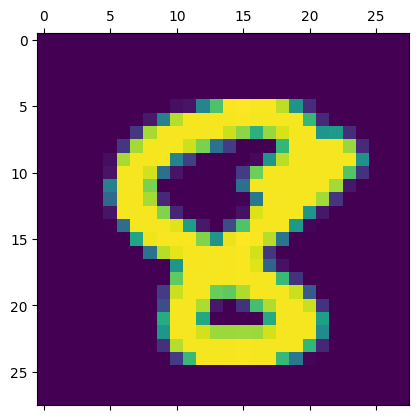

In [ ]:
#predicted value
y_pred_enc = model.predict(x_test)

#actual value
y_act = [np.argmax(i) for i in y_test_enc]

#decoding predicted value
y_pred = [np.argmax(i) for i in y_pred_enc]

print(y_pred_enc[27])
print(y_act[27])
print(y_pred[27])


plt.matshow(x_test[27])

Predicting on test data

In [ ]:
#predicted value
y_pred_enc = model.predict(test)

#actual value
#y_act = [np.argmax(i) for i in test]

#decoding predicted value
y_pred = [np.argmax(i) for i in y_pred_enc]

print(y_pred_enc[10])
#print(y_act[0])
print(y_pred[10])

875/875 [==============================] - 9s 10ms/step
[4.0264940e-12 4.8006192e-14 4.0032281e-13 9.6898376e-08 2.6369150e-12
 9.9999982e-01 8.8646273e-09 6.2304974e-11 2.0320050e-10 1.5267867e-09]
5


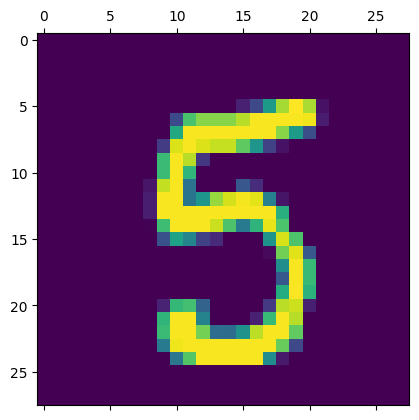

In [ ]:
plt.matshow(test[10])

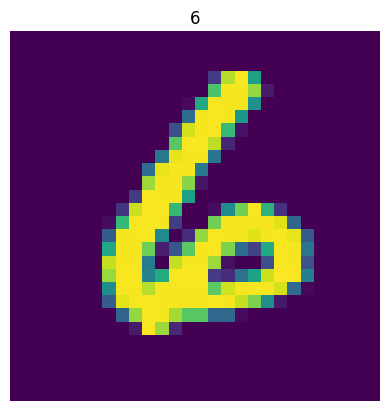

In [ ]:
#fig, ax = plt.subplot(figsize=(18,12))
for ind, row in enumerate(test[:35]):
  #plt.subplot(3, 5, ind+1)
  plt.title(y_pred[ind])
  img = row.reshape(28, 28)
  plt.axis('off')
  plt.imshow(img)

In [ ]:
model.save('digit_classifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


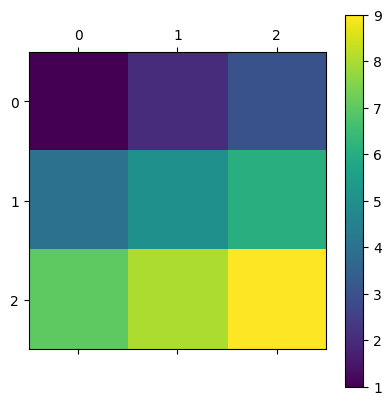

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 2D array
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Display the array as a color-coded image
plt.matshow(A)
plt.colorbar()
plt.show()